# FSS - Software Evolution - Task 1
# Exercise 1

## Part I
In this cell we extract all commit messages since 2023-01-01 and tokenize them into words.  

We then compute term frequencies to see which words are most common

This gives a first high-level indication of how many commits are likely related to defects, refactorings, and performance improvements.

In this first chunk we extract: bug-fix related keywords (e.g., `fix`, `bug`, `issue`, `error`)

In [8]:
!git -C "C:\Users\ameli\SoftSys\transformers" log --since="2023-01-01" --pretty=format:%s > commits.txt
import re
from collections import Counter
import subprocess

messages = open('commits.txt', 'r', encoding='utf-8').read().lower()
words = re.findall(r'\b[a-z]+\b', messages)

word_counts = Counter(words)

word_list = list(word_counts.items())  

word_list.sort(key=lambda x: x[1], reverse=True)

with open("word_counts.txt", "w", encoding="utf-8") as f:
    for word, count in word_list:
        f.write(f"{word},{count}\n")

print(f"Total unique words: {len(word_counts)}")
print("Top 10 most common:")
print(word_counts.most_common(10))

take_out = ['the', 'and', 'to', 'of', 'in', 'a', 'is', 'for', 'on', 'with', 'this', 'that', 'it', 'as', 'by', 'an', 'be', 'are', 'at', 'from', 'or', 'not', 'we', 'but', 'all', 'if', 'have', 'has', 'was', 'were', 'when']
for word in take_out:
    if word in word_counts:
        del word_counts[word]
with open("word_counts_filtered.txt", "w", encoding="utf-8") as f:
    for word, count in word_counts.most_common():
        f.write(f"{word},{count}\n")

print(f"Total unique words after filtering: {len(word_counts)}")
print(word_counts.most_common(10))




Total unique words: 4680
Top 10 most common:
[('fix', 2992), ('in', 1673), ('to', 1667), ('for', 1647), ('add', 1242), ('update', 682), ('and', 665), ('tests', 594), ('the', 586), ('model', 584)]
Total unique words after filtering: 4649
[('fix', 2992), ('add', 1242), ('update', 682), ('tests', 594), ('model', 584), ('docs', 546), ('remove', 419), ('support', 387), ('md', 384), ('test', 330)]


In this first chunk we extract: bug-fix related keywords (e.g., `fix`, `bug`, `issue`, `error`)

In [9]:
bugfix_keywords = ['fix', 'fixed', 'fixes', 'fixing', 'resolve', 'resolves', 'resolved', 'bug', 'bugs', 'issue', 'issues', 'hotfix', 'crash', 'failure', 'error', 'regression', 'correct', 'corrected']

for word in bugfix_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

bugfix_count = sum(word_counts[word] for word in bugfix_keywords if word in word_counts)
print(f"Total bugfix-related words: {bugfix_count}")

fix: 2992
fixed: 120
fixes: 129
fixing: 31
resolve: 8
resolved: 1
bug: 145
bugs: 17
issue: 138
issues: 48
hotfix: 10
crash: 8
failure: 20
error: 171
regression: 17
correct: 75
corrected: 9
Total bugfix-related words: 3939


In this first chunk we extract: refactoring-related keywords (e.g., `refactor`, `cleanup`)

In [10]:
refactor_keywords = ['refactor', 'refactored', 'refactoring', 'cleanup', 'cleaned', 'restructure', 'restructured', 'restructuring']
refactor_count = sum(word_counts[word] for word in refactor_keywords if word in word_counts)
print(f"Total refactor-related words: {refactor_count}")
for word in refactor_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

Total refactor-related words: 151
refactor: 107
refactored: 1
refactoring: 9
cleanup: 30
restructure: 4


In this first chunk we extract: performance-related keywords (e.g., `performance`, `faster`, `optimize`)

In [11]:
performance_keywords = ['performance', 'performant', 'speed', 'faster', 'optimize', 'optimized']
performance_count = sum(word_counts[word] for word in performance_keywords if word in word_counts)
print(f"Total performance-related words: {performance_count}")

for word in performance_keywords:
    if word in word_counts:
        print(f"{word}: {word_counts[word]}")

Total performance-related words: 62
performance: 16
speed: 11
faster: 20
optimize: 12
optimized: 3


## Part II

In this cell we parse the commit log (date + message) since 2023-01-01 and flag each commit as defect-related or not using the `bugfix_keywords` list.  
We then group all defect-related commits by month and plot how the number of “bug-fix commits” evolves over time.

In [23]:
!pip install pandas

  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
!git -C "C:\Users\ameli\SoftSys\transformers" log --since="2023-01-01" --pretty=format:"%ad|||%s" --date=short > commits_with_dates.txt
import datetime
import pandas as pd

df = pd.read_csv('commits_with_dates.txt', sep='\\|\\|\\|', names=['date', 'message'], engine='python')

df['date'] = pd.to_datetime(df['date'])

pattern = re.compile(r'\b(' + '|'.join(bugfix_keywords) + r')\b', re.IGNORECASE)
df['is_bugfix'] = df['message'].apply(lambda x: bool(pattern.search(x)))

defect_df = df[df['is_bugfix']]
defects_per_month = defect_df.groupby(defect_df['date'].dt.to_period('M')).size()

defects_per_month = defects_per_month.reset_index(name='defect_count')
defects_per_month['date'] = defects_per_month['date'].dt.to_timestamp()

print(defects_per_month)

         date  defect_count
0  2023-01-01            85
1  2023-02-01            90
2  2023-03-01           114
3  2023-04-01            82
4  2023-05-01           107
5  2023-06-01           100
6  2023-07-01            77
7  2023-08-01            87
8  2023-09-01            78
9  2023-10-01           109
10 2023-11-01            82
11 2023-12-01            92
12 2024-01-01            71
13 2024-02-01            70
14 2024-03-01            89
15 2024-04-01           119
16 2024-05-01            83
17 2024-06-01            73
18 2024-07-01            88
19 2024-08-01            79
20 2024-09-01            90
21 2024-10-01           111
22 2024-11-01            67
23 2024-12-01            63
24 2025-01-01            89
25 2025-02-01            90
26 2025-03-01           118
27 2025-04-01           134
28 2025-05-01           102
29 2025-06-01           132
30 2025-07-01           143
31 2025-08-01           149
32 2025-09-01           137
33 2025-10-01           129
34 2025-11-01       

Here Simply the plot

In [17]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/31/3c/80816f027b3a4a28cd2a0a6ef7f89a2db22310e945cd886ec25bfb399221/matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata
  Using cached matplotlib-3.10.7-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/19/e8/6026ed58a64563186a9ee3f29f41261fd1828f527dd93d33b60feca63352/contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/88/8f/a55b5550cd33cd1028601df41acd057d4be20ef


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


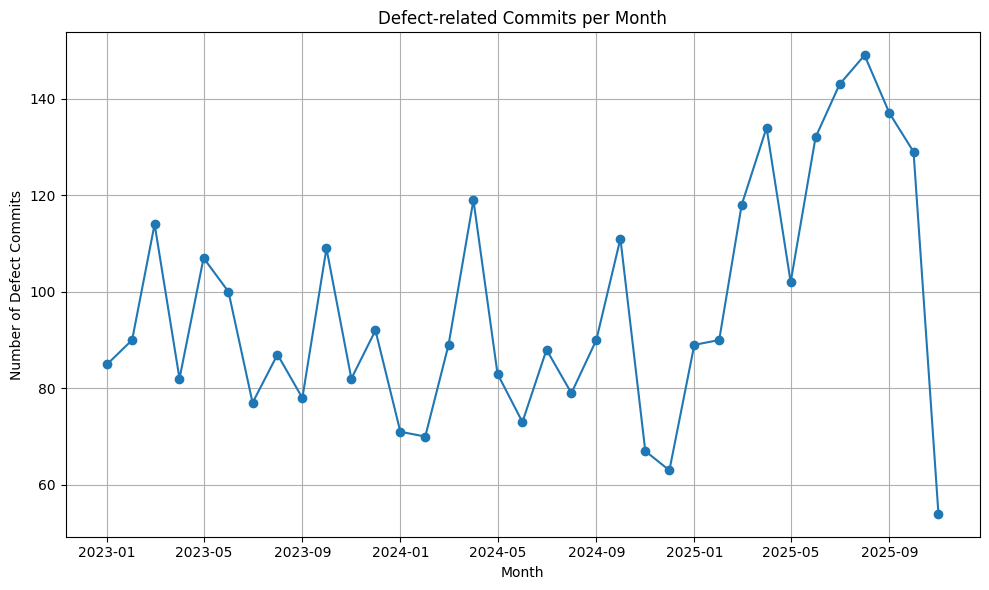

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(defects_per_month['date'], defects_per_month['defect_count'], marker='o')
plt.title('Defect-related Commits per Month')
plt.xlabel('Month')
plt.ylabel('Number of Defect Commits')
plt.grid(True)
plt.tight_layout()
plt.show()

## Part 3

We take all the commits messages, dates and file names

In [19]:
!git -C "C:\Users\ameli\SoftSys\transformers" log --since="2023-01-01" --pretty=format:"%ad|||%s" --date=short --name-only > commits_with_dates_filenames.txt


We create a dataframe with messages, dates and file names

In [22]:
with open("commits_with_dates_filenames.txt", "r", encoding="utf-8") as f:
    lines = [line.strip() for line in f]

commits = []
current = None
header_pattern = re.compile(r"^\d{4}-\d{2}-\d{2}\|\|\|")

for line in lines:
    if not line:
        continue  # skip empty lines

    if header_pattern.match(line):  # new commit
        if current is not None:
            commits.append(current)
        date, message = line.split("|||", 1)
        current = {"date": date, "message": message, "files": []}
    else:
        if current is not None:
            current["files"].append(line)

# add last commit
if current is not None:
    commits.append(current)

len(commits)

rows = []
for c in commits:
    for f in c["files"]:
        rows.append({"date": c["date"], "message": c["message"], "file": f})

df = pd.DataFrame(rows)
df.head()


,date,message,file
0,2025-11-12,[models] Add AudioFlamingo3 integration (#40290),docs/source/en/_toctree.yml
1,2025-11-12,[models] Add AudioFlamingo3 integration (#40290),docs/source/en/model_doc/audioflamingo3.md
2,2025-11-12,[models] Add AudioFlamingo3 integration (#40290),src/transformers/models/__init__.py
3,2025-11-12,[models] Add AudioFlamingo3 integration (#40290),src/transformers/models/audioflamingo3/__init_...
4,2025-11-12,[models] Add AudioFlamingo3 integration (#40290),src/transformers/models/audioflamingo3/configu...


We filter for bugfix keywords and find the most frquent files

In [25]:
pattern = "|".join(bugfix_keywords )
df_bug = df[df["message"].str.lower().str.contains(pattern, regex=True)]


file_counts = df_bug.groupby("file").size().sort_values(ascending=False)
top2 = file_counts.head(2)
top2

file
src/transformers/modeling_utils.py    205
src/transformers/trainer.py           194
dtype: int64

Now we plot the number of defects per month of the top two files

In [27]:
df_bug["date"] = pd.to_datetime(df_bug["date"])
df_bug["month"] = df_bug["date"].dt.to_period("M")
file1 = top2.index[0]
file2 = top2.index[1]

df1 = df_bug[df_bug["file"] == file1]
monthly1 = df1.groupby("month").size()

df2 = df_bug[df_bug["file"] == file2]
monthly2 = df2.groupby("month").size()

C:\Users\ameli\AppData\Local\Temp\ipykernel_16316\2832553911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bug["date"] = pd.to_datetime(df_bug["date"])
C:\Users\ameli\AppData\Local\Temp\ipykernel_16316\2832553911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bug["month"] = df_bug["date"].dt.to_period("M")


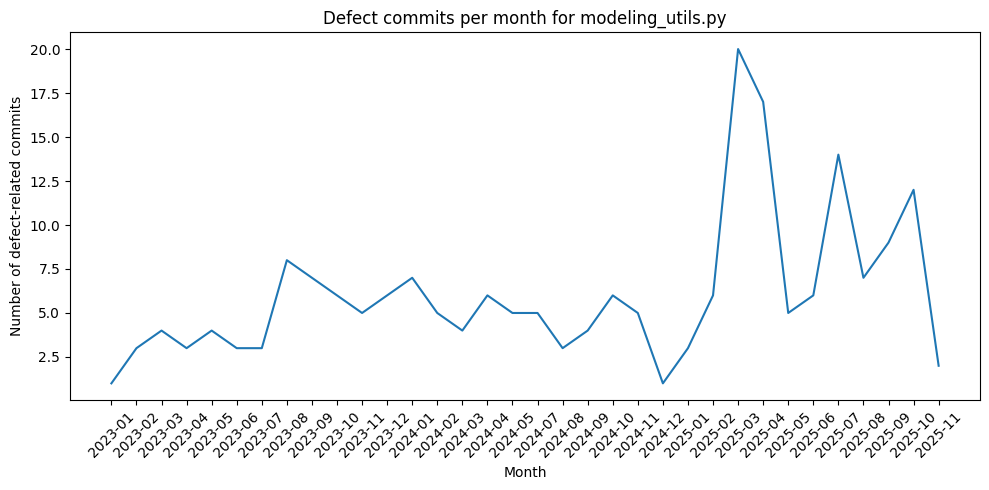

In [28]:


plt.figure(figsize=(10,5))
plt.plot(monthly1.index.astype(str), monthly1.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of defect-related commits")
plt.title("Defect commits per month for modeling_utils.py")
plt.tight_layout()
plt.show()


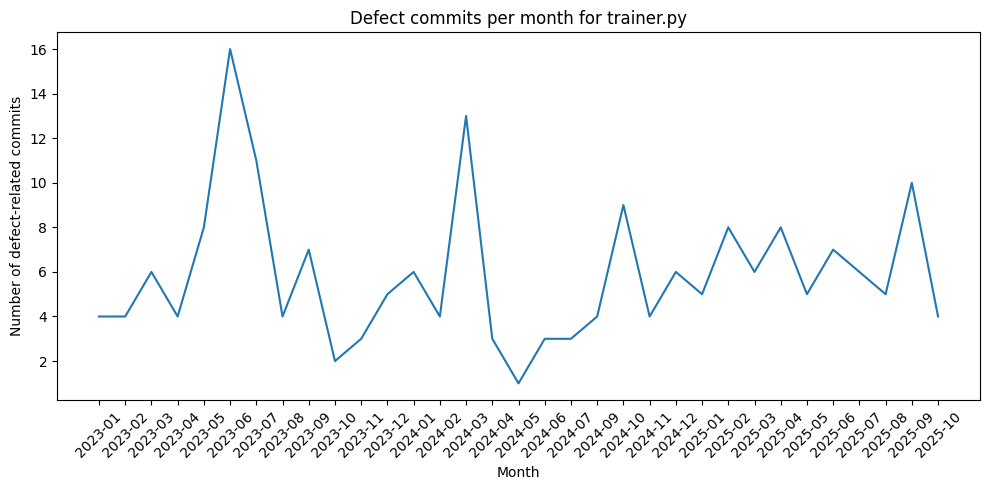

In [29]:
plt.figure(figsize=(10,5))
plt.plot(monthly2.index.astype(str), monthly2.values)
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of defect-related commits")
plt.title("Defect commits per month for trainer.py")
plt.tight_layout()
plt.show()


# Exercise 2

We select the Cyclomati Complexity CC and Line of Code LoC

## Import and repo assignment

In [87]:
from pathlib import Path

import lizard
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

REPO_ROOT = Path("transformers").resolve()


## Part I: Calculation of complexities for .py files

analyze_file_compelxity

    Input: a path, in our case the .py files originating from the REPO_ROOT

    Processing: For each file use lizard package to extract LoC and CC

    Output: Dictionary with: Relative file path (from ROOT), LoC, CC


We abbend a dictionary to a list of record for every .py file found. Print head and description from numpy for sumamry statistics.

In [88]:
def analyze_file_complexity(path: Path) -> dict:
    analysis = lizard.analyze_file(str(path))

    loc = analysis.nloc
    
    total_cc = sum(func.cyclomatic_complexity for func in analysis.function_list)
    
    return {
        "file_path": str(path.relative_to(REPO_ROOT)),
        "loc": loc,
        "cc": total_cc,
    }

py_files = list(REPO_ROOT.rglob("*.py"))
len(py_files)
records = []

for path in py_files:
    rec = analyze_file_complexity(path)
    records.append(rec)

complexity_df = pd.DataFrame(records)
complexity_df.head()

complexity_df.describe()

,loc,cc
count,3691.000000,3691.000000
mean,283.667028,45.056082
std,399.108555,75.400304
min,0.000000,0.000000
25%,17.000000,1.000000
50%,135.000000,18.000000
75%,365.000000,54.000000
max,4973.000000,1255.000000


## Part II Visualizations of Complexities (Hotspots)

In this cell we identify complexity hotspots at file level using our two metrics:
Lines of Code (LoC) and total Cyclomatic Complexity (CC).

- We first select the 10 files with the highest CC and the 10 files with the highest LoC.
- We merge these sets and label each file as:
  - `top CC`  → among the 10 highest CC values,
  - `top LoC` → among the 10 longest files,
  - `both`    → appears in the top 10 for both CC and LoC.
- We display a summary table and a scatter plot (LoC vs CC) where all files are shown in the background and the hotspots are highlighted and annotated.

,short_name,file_path,loc,cc,hotspot_type
0,trainer.py,src/transformers/trainer.py,4005,1255,both
1,modeling_utils.py,src/transformers/modeling_utils.py,3950,1238,both
2,test_modeling_common.py,tests/test_modeling_common.py,3431,878,both
8,modeling_seamless_m4t_v2.py,src/transformers/models/seamless_m4t_v2/modeli...,2808,533,both
3,tokenization_utils_base.py,src/transformers/tokenization_utils_base.py,2320,613,top CC
4,utils.py,src/transformers/generation/utils.py,2481,612,top CC
5,testing_utils.py,src/transformers/testing_utils.py,2118,600,top CC
6,integration_utils.py,src/transformers/integrations/integration_util...,1797,575,top CC
7,modeling_tf_utils.py,src/transformers/modeling_tf_utils.py,2048,571,top CC
9,import_utils.py,src/transformers/utils/import_utils.py,1827,520,top CC


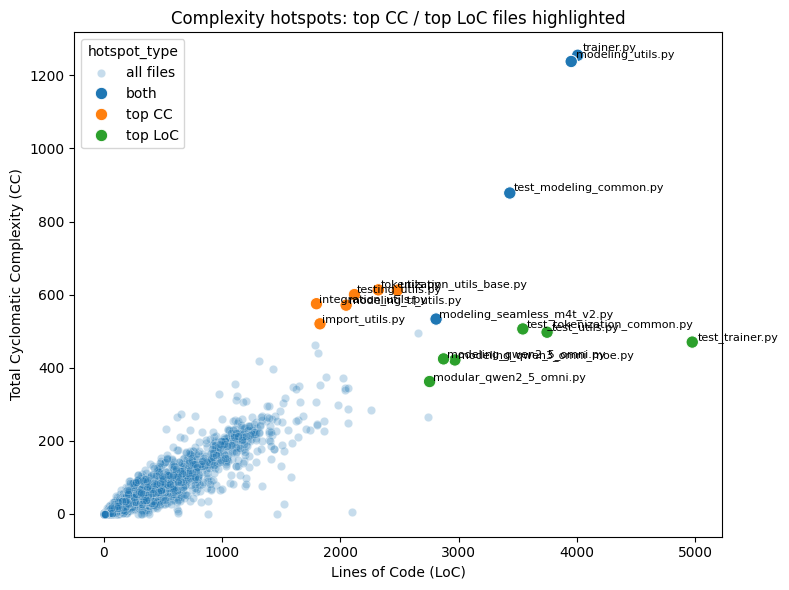

In [89]:

top_cc_10 = (
    complexity_df
    .sort_values("cc", ascending=False)
    .head(10)
    .copy()
)
top_cc_10["short_name"] = top_cc_10["file_path"].apply(lambda p: Path(p).name)
top_cc_10["hotspot_type"] = "top CC"

top_loc_10 = (
    complexity_df
    .sort_values("loc", ascending=False)
    .head(10)
    .copy()
)
top_loc_10["short_name"] = top_loc_10["file_path"].apply(lambda p: Path(p).name)
top_loc_10["hotspot_type"] = "top LoC"

hotspots = pd.concat([top_cc_10, top_loc_10], ignore_index=True)
hotspots = hotspots.drop_duplicates(subset=["file_path"], keep="first")

both_mask = (
    hotspots["file_path"].isin(top_cc_10["file_path"])
    & hotspots["file_path"].isin(top_loc_10["file_path"])
)
hotspots.loc[both_mask, "hotspot_type"] = "both"

hotspots_table = (
    hotspots[["short_name", "file_path", "loc", "cc", "hotspot_type"]]
    .sort_values(by=["hotspot_type", "cc"], ascending=[True, False])
)
display(hotspots_table)

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=complexity_df,
    x="loc",
    y="cc",
    alpha=0.25,
    label="all files",
)

sns.scatterplot(
    data=hotspots,
    x="loc",
    y="cc",
    s=80,
    hue="hotspot_type",
)

for _, row in hotspots.iterrows():
    plt.text(
        row["loc"] * 1.01,
        row["cc"] * 1.01,
        row["short_name"],
        fontsize=8,
    )

plt.xlabel("Lines of Code (LoC)")
plt.ylabel("Total Cyclomatic Complexity (CC)")
plt.title("Complexity hotspots: top CC / top LoC files highlighted")
plt.tight_layout()
plt.show()


Visualization at higher level of the directory tree that shows the average CC and LoC for each directory at 2 levels of depth.

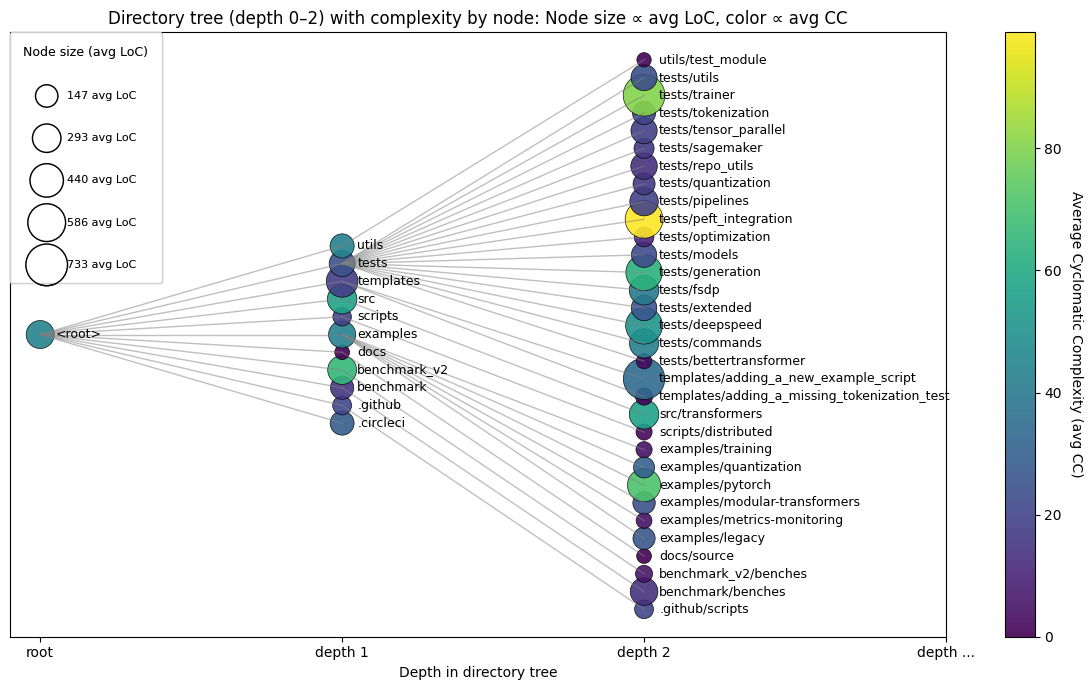

In [93]:
tree_rows = []

for _, row in complexity_df.iterrows():
    path = Path(row["file_path"])          
    parts = path.parts                     
    dirs = parts[:-1]                      
    
    max_depth = min(3, len(dirs))          
    for depth in range(1, max_depth + 1):
        node = "/".join(dirs[:depth])      
        tree_rows.append(
            {
                "depth": depth,
                "node": node,
                "loc": row["loc"],
                "cc": row["cc"],
            }
        )

tree_df = pd.DataFrame(tree_rows)

agg = (
    tree_df
    .groupby(["depth", "node"])
    .agg(
        avg_loc=("loc", "mean"),
        avg_cc=("cc", "mean"),
        total_loc=("loc", "sum"),
        total_cc=("cc", "sum"),
        file_count=("loc", "count"),
    )
    .reset_index()
)

nodes = []

root_total_loc = agg["total_loc"].sum()
root_total_cc = agg["total_cc"].sum()
root_file_count = agg["file_count"].sum()
root_avg_cc = root_total_cc / root_file_count if root_file_count > 0 else 0.0
root_avg_loc = root_total_loc / root_file_count if root_file_count > 0 else 0.0

nodes.append({
    "depth": 0,
    "node": "<root>",
    "total_loc": root_total_loc,
    "total_cc": root_total_cc,
    "avg_cc": root_avg_cc,
    "avg_loc": root_avg_loc,
})

for _, row in agg.iterrows():
    if row["depth"] <= 2:
        nodes.append({
            "depth": int(row["depth"]),
            "node": row["node"],
            "total_loc": row["total_loc"],
            "total_cc": row["total_cc"],
            "avg_cc": row["avg_cc"],
            "avg_loc": row["avg_loc"],
        })

nodes_df = pd.DataFrame(nodes)

pos = {}          
metrics = {}     

max_avg_loc = nodes_df["avg_loc"].max() or 1.0

for depth in sorted(nodes_df["depth"].unique()):
    level_nodes = nodes_df[nodes_df["depth"] == depth].copy()
    level_nodes = level_nodes.sort_values("node").reset_index(drop=True)
    
    n = len(level_nodes)
    ys = np.linspace(-(n - 1) / 2, (n - 1) / 2, n)
    
    for i, row in level_nodes.iterrows():
        name = row["node"]
        x = depth
        y = ys[i]
        pos[name] = (x, y)
        metrics[name] = {
            "total_cc": row["total_cc"],
            "total_loc": row["total_loc"],
            "avg_cc": row["avg_cc"],
            "avg_loc": row["avg_loc"],
            "depth": depth,
        }


edges = []

for name, m in metrics.items():
    d = m["depth"]
    if d == 0:
        continue  
    if d == 1:
        parent = "<root>"
    else:
        parent = "/".join(name.split("/")[:-1])
    if parent in pos:
        edges.append((parent, name))

plt.figure(figsize=(12, 7))

for parent, child in edges:
    x0, y0 = pos[parent]
    x1, y1 = pos[child]
    plt.plot([x0, x1], [y0, y1], linewidth=1.0, alpha=0.5, color="gray")

node_x = []
node_y = []
node_sizes = []
node_colors = []

for name, (x, y) in pos.items():
    m = metrics[name]
    node_x.append(x)
    node_y.append(y)
    size = 100 + 800 * (m["avg_loc"] / max_avg_loc)
    node_sizes.append(size)
    node_colors.append(m["avg_cc"])

sc = plt.scatter(
    node_x,
    node_y,
    s=node_sizes,
    c=node_colors,
    cmap="viridis",
    alpha=0.9,
    edgecolor="black",
    linewidth=0.5,
)

cbar = plt.colorbar(sc)
cbar.set_label("Average Cyclomatic Complexity (avg CC)", rotation=270, labelpad=15)

for name, (x, y) in pos.items():
    d = metrics[name]["depth"]
    if d <= 2:
        plt.text(x + 0.05, y, name, fontsize=9, va="center")

ref_loc_values = np.linspace(0.2 * max_avg_loc, max_avg_loc, 5)
handles = []
labels = []
for v in ref_loc_values:
    size = 100 + 800 * (v / max_avg_loc)
    h = plt.scatter([], [], s=size, edgecolor="black", facecolor="none")
    handles.append(h)
    labels.append(f"{v:.0f} avg LoC")

legend_loc = plt.legend(
    handles,
    labels,
    title="Node size (avg LoC)",
    loc="upper left",
    frameon=True,
    fontsize=8,          
    title_fontsize=9,    
    labelspacing=2.9,     
    borderpad=1.2,        
    borderaxespad=0,    
)
plt.gca().add_artist(legend_loc)

plt.xticks([0, 1, 2, 3], ["root", "depth 1", "depth 2", "depth ..."])
plt.yticks([])
plt.xlabel("Depth in directory tree")
plt.ylabel("")
plt.title(
    "Directory tree (depth 0–2) with complexity by node: "
    "Node size ∝ avg LoC, color ∝ avg CC"
)
plt.tight_layout()
plt.show()


## Part III: Do files with more lines of code tend to have higher cyclomatic complexity?

To explore this part we calculate two correlation coefficients: Pearson and Spearman

We plot the values into a scatterplot CC vs LoC

We calculate the mean of Cyclomatic Complexity per LoC quartile

We would answer: YES in general you can say something loike this

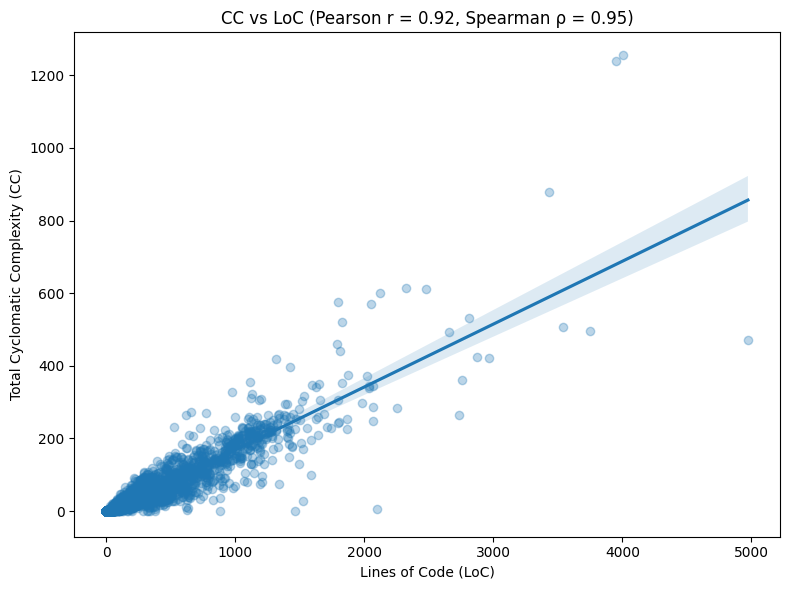


Cyclomatic Complexity per LoC quartile:
               mean  median  count
loc_bin                           
small      0.111111     0.0    927
medium    10.055435     8.0    920
large     36.605206    33.0    922
xlarge   133.620390   107.0    922


/var/folders/3m/93hr42491d3___139hlxxdxm0000gn/T/ipykernel_71483/4187920312.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cc_by_bin = complexity_df.groupby("loc_bin")["cc"].agg(["mean", "median", "count"])


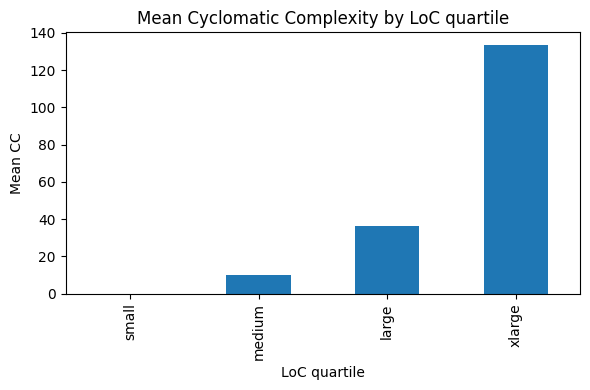

In [91]:
pearson_r = complexity_df["cc"].corr(complexity_df["loc"], method="pearson")

cc_rank = complexity_df["cc"].rank()
loc_rank = complexity_df["loc"].rank()
spearman_r = cc_rank.corr(loc_rank, method="pearson")

plt.figure(figsize=(8, 6))
sns.regplot(
    data=complexity_df,
    x="loc",
    y="cc",
    scatter_kws={"alpha": 0.3},
)

plt.xlabel("Lines of Code (LoC)")
plt.ylabel("Total Cyclomatic Complexity (CC)")
plt.title(f"CC vs LoC (Pearson r = {pearson_r:.2f}, Spearman ρ = {spearman_r:.2f})")
plt.tight_layout()
plt.show()

complexity_df["loc_bin"] = pd.qcut(
    complexity_df["loc"],
    q=4,
    labels=["small", "medium", "large", "xlarge"]
)

cc_by_bin = complexity_df.groupby("loc_bin")["cc"].agg(["mean", "median", "count"])
print("\nCyclomatic Complexity per LoC quartile:")
print(cc_by_bin)

plt.figure(figsize=(6, 4))
cc_by_bin["mean"].plot(kind="bar")
plt.ylabel("Mean CC")
plt.xlabel("LoC quartile")
plt.title("Mean Cyclomatic Complexity by LoC quartile")
plt.tight_layout()
plt.show()

## Part IV: Defects vs. Compexity

In this cell we investigate whether more complex files tend to be more defective.

- We first extract all commits since 2023-01-01, mark those that look like bug fixes
  using our `bugfix_keywords`, and collect all `.py` files touched by these bug-fix commits.
- For each file we count how many defect-related commits touched it, obtaining a
  `defects_per_file` measure.
- We merge this with our per-file complexity metrics (LoC and CC) and compute both
  Pearson and Spearman correlations between:
  - defects and CC
  - defects and LoC
- Finally, we plot two regression scatter plots: `defects vs CC` and `defects vs LoC`.


Answer: YES in general there are indication of correlation, however not so strong as before

corr(defects, CC)  — Pearson: 0.667 | Spearman: 0.556
corr(defects, LoC) — Pearson: 0.570 | Spearman: 0.600


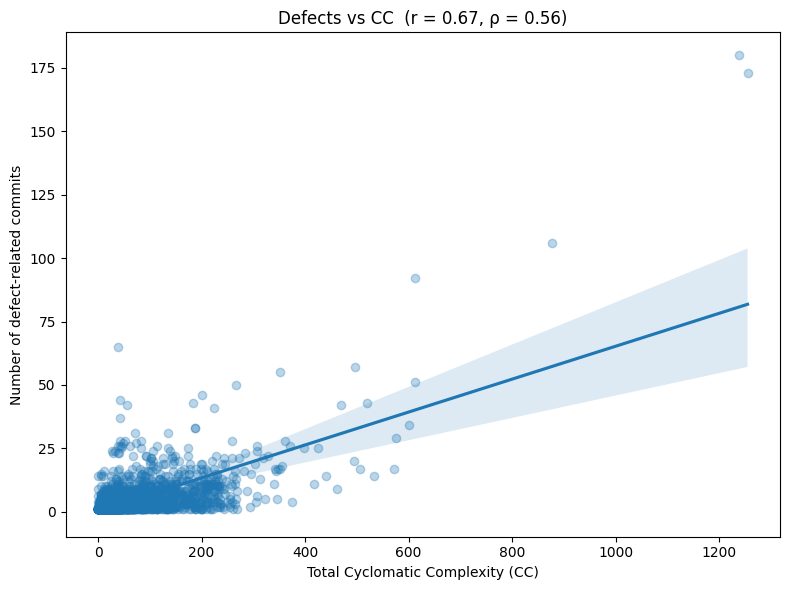

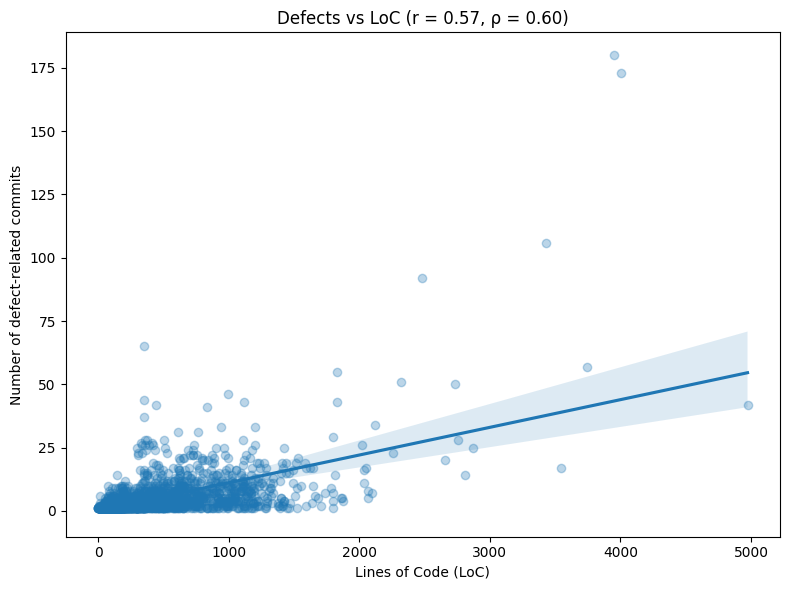

In [92]:
import subprocess

!git -C transformers log --since="2023-01-01" --pretty=format:"%H|||%ad|||%s" --date=short > commits_sha_date_msg.txt

full = pd.read_csv(
    "commits_sha_date_msg.txt",
    sep=r"\|\|\|",
    names=["sha", "date", "message"],
    engine="python",
)

full["date"] = pd.to_datetime(full["date"], errors="coerce")
full = full.dropna(subset=["date"])

pattern = re.compile(r"\b(" + "|".join(bugfix_keywords) + r")\b", re.IGNORECASE)
full["is_bugfix"] = full["message"].apply(lambda x: bool(pattern.search(str(x))))

bugfix = full.loc[full["is_bugfix"], ["sha", "date"]]

ctr = Counter()

for sha, dt in bugfix.itertuples(index=False):
    files = subprocess.check_output(
        ["git", "-C", REPO, "show", "--name-only", "--pretty=format:", sha],
        text=True,
    ).strip().splitlines()

    for f in files:
        if f.endswith(".py") and f.strip():
            fp = Path(f).as_posix()  
            ctr[fp] += 1

defects_per_file = (
    pd.DataFrame(ctr.items(), columns=["file_path", "defects"])
    .sort_values("defects", ascending=False)
    .reset_index(drop=True)
)

defects_per_file.to_csv("defects_per_file.csv", index=False)

evidence_df = complexity_df.merge(defects_per_file, on="file_path", how="inner")

pearson_cc  = evidence_df["defects"].corr(evidence_df["cc"],  method="pearson")
pearson_loc = evidence_df["defects"].corr(evidence_df["loc"], method="pearson")

spearman_cc  = evidence_df["defects"].rank().corr(evidence_df["cc"].rank(),  method="pearson")
spearman_loc = evidence_df["defects"].rank().corr(evidence_df["loc"].rank(), method="pearson")

print(f"corr(defects, CC)  — Pearson: {pearson_cc:.3f} | Spearman: {spearman_cc:.3f}")
print(f"corr(defects, LoC) — Pearson: {pearson_loc:.3f} | Spearman: {spearman_loc:.3f}")

plt.figure(figsize=(8, 6))
sns.regplot(data=evidence_df, x="cc", y="defects", scatter_kws={"alpha": 0.3})
plt.xlabel("Total Cyclomatic Complexity (CC)")
plt.ylabel("Number of defect-related commits")
plt.title(f"Defects vs CC  (r = {pearson_cc:.2f}, ρ = {spearman_cc:.2f})")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(data=evidence_df, x="loc", y="defects", scatter_kws={"alpha": 0.3})
plt.xlabel("Lines of Code (LoC)")
plt.ylabel("Number of defect-related commits")
plt.title(f"Defects vs LoC (r = {pearson_loc:.2f}, ρ = {spearman_loc:.2f})")
plt.tight_layout()
plt.show()




# Taks 3

### 3.1

In [13]:
# Imports
from pydriller import Repository
from datetime import datetime
from collections import defaultdict
from itertools import combinations
from pathlib import Path
import matplotlib.pyplot as plt


In [14]:
from pathlib import Path
import subprocess

# clone transformers if missing
repo_dir = Path("transformers")
if not repo_dir.exists():
    print("Cloning transformers repository...")
    subprocess.run([
        "git", "clone", 
        "https://github.com/huggingface/transformers.git", 
        "transformers"
    ], check=True)

In [15]:
# Custom function to count the logical coupling
REPO_PATH = str(repo_dir)

def count_coupling(REPO_PATH=REPO_PATH, include_test=False):
    logical_coupling = defaultdict(int)
    
    def is_test_file(filepath):
        """Check if a file is a test file based on path or filename"""
        return (filepath.startswith("test_") or 
                "/test_" in filepath or 
                filepath.startswith("tests/") or 
                "/tests/" in filepath)

    for commit in Repository(REPO_PATH, since=datetime(2023, 1, 1)).traverse_commits():
        test_files = []
        non_test_files = []

        for m in commit.modified_files:
            if m.new_path is None:
                continue
            if not m.new_path.endswith(".py"):
                continue

            if is_test_file(m.new_path):
                test_files.append(m.new_path)
            else:
                non_test_files.append(m.new_path)

        if include_test:
            # Subtask 2 
            if len(test_files) == 0 or len(non_test_files) == 0:
                continue
            for test_file in test_files:
                for non_test_file in non_test_files:
                    logical_coupling[(test_file, non_test_file)] += 1
        else:
            # Subtask 1
            if len(non_test_files) < 2:
                continue
            for f1, f2 in combinations(sorted(set(non_test_files)), 2):
                logical_coupling[(f1, f2)] += 1

    sorted_pairs = sorted(logical_coupling.items(), key=lambda x: x[1], reverse=True)
    top_10 = sorted_pairs[:10]

    for (f1, f2), count in top_10:
        print(count, f1, "<->", f2)
    
    return top_10

In [16]:
top_10 = count_coupling()


247 src/transformers/__init__.py <-> src/transformers/utils/dummy_pt_objects.py
241 src/transformers/models/auto/configuration_auto.py <-> src/transformers/models/auto/modeling_auto.py
226 src/transformers/models/__init__.py <-> src/transformers/models/auto/configuration_auto.py
217 src/transformers/models/__init__.py <-> src/transformers/models/auto/modeling_auto.py
199 src/transformers/__init__.py <-> src/transformers/models/auto/modeling_auto.py
194 src/transformers/models/auto/modeling_auto.py <-> src/transformers/utils/dummy_pt_objects.py
176 src/transformers/__init__.py <-> src/transformers/models/auto/configuration_auto.py
171 src/transformers/__init__.py <-> src/transformers/models/__init__.py
167 src/transformers/models/auto/configuration_auto.py <-> src/transformers/utils/dummy_pt_objects.py
165 src/transformers/models/__init__.py <-> src/transformers/utils/dummy_pt_objects.py


In [17]:

def make_bar_chart(top_10=top_10):
    labels = [f"{f1} <-> {f2}" for (f1, f2), _ in top_10]
    counts = [count for _, count in top_10]

    plt.figure(figsize=(12, 6))
    plt.barh(range(len(top_10)), counts)
    plt.yticks(range(len(top_10)), labels)
    plt.xlabel("Number of commits co-changed")
    plt.title("Top 10 logically coupled file pairs")
    plt.gca().invert_yaxis()  # highest value at the top
    plt.tight_layout()
    plt.show()


In [ ]:
# horizontal bar chart for task 1
make_bar_chart()

### 3.2

In [18]:
# find the top 10 pairs (switching include_test to true)
top_10_2 = count_coupling(include_test=True)


131 tests/generation/test_utils.py <-> src/transformers/generation/utils.py
92 tests/trainer/test_trainer.py <-> src/transformers/trainer.py
90 tests/test_modeling_common.py <-> src/transformers/modeling_utils.py
55 tests/trainer/test_trainer.py <-> src/transformers/training_args.py
55 tests/utils/test_modeling_utils.py <-> src/transformers/modeling_utils.py
43 tests/generation/test_utils.py <-> src/transformers/generation/configuration_utils.py
38 tests/test_modeling_common.py <-> src/transformers/generation/utils.py
37 tests/test_modeling_common.py <-> src/transformers/models/llama/modeling_llama.py
33 tests/test_modeling_common.py <-> src/transformers/models/bart/modeling_bart.py
32 tests/pipelines/test_pipelines_automatic_speech_recognition.py <-> src/transformers/pipelines/automatic_speech_recognition.py


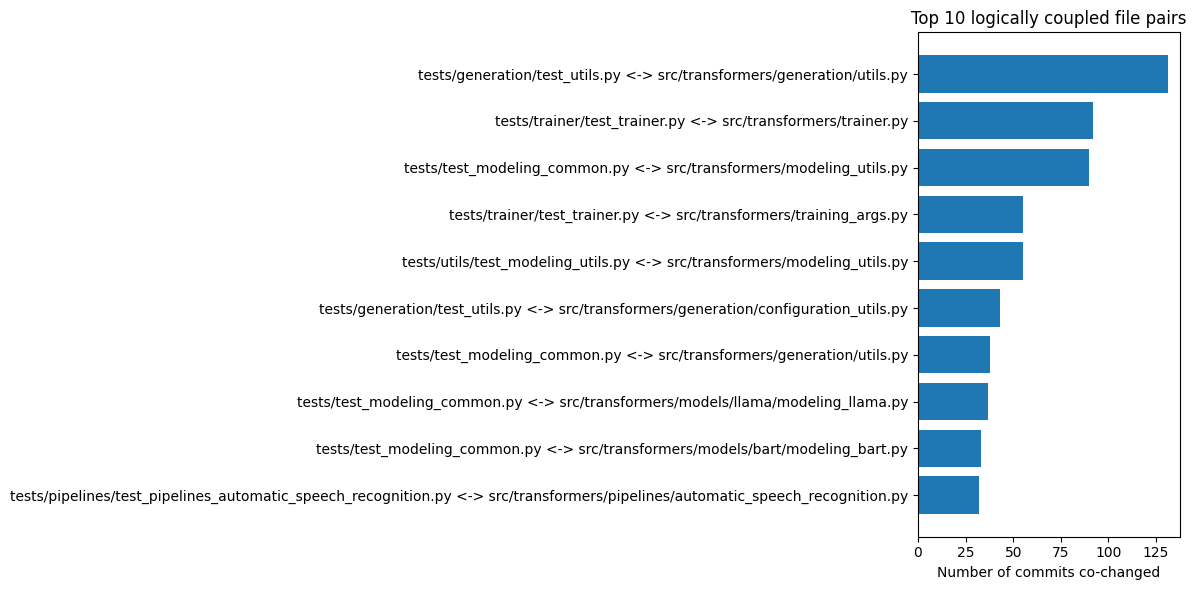

In [19]:
# make the barchart for task 2
make_bar_chart(top_10_2)

### 3.4 

#### First method: based on naming conventions

In [20]:
def path_based_guess(source_file, repo_path=REPO_PATH):
    """Path-based guess."""
    src_path = Path(source_file)

    # strip leading src
    if src_path.parts and src_path.parts[0] == "src":
        rel_path = Path(*src_path.parts[1:])  
    else:
        rel_path = src_path

    #  just the module structure after transformers
    if rel_path.parts and rel_path.parts[0] == "transformers":
        module_path = Path(*rel_path.parts[1:])  
    else:
        module_path = rel_path

    base = module_path.stem  # utils
    test_name = f"test_{base}.py"  

    candidates = [
        Path(repo_path) / "tests" / module_path.parent / test_name,  
        Path(repo_path) / "tests" / test_name,  
    ]

    if len(module_path.parts) > 1:
        parent = module_path.parts[-2]  # generation
        candidates.append(Path(repo_path) / "tests" / module_path.parent / f"test_{parent}.py")

    # Return first candidate
    for c in candidates:
        if c.exists():
            return str(c)

    return str(candidates[0])

#### Second method: based on Logical Copupling

In [21]:
def coupling_based_test(source_file, repo_path=REPO_PATH):
    """History-based guess."""
    repo = Repository(repo_path, since=datetime(2023, 1, 1))
    counts = defaultdict(int)
    src_norm = str(Path(source_file).as_posix())

    for commit in repo.traverse_commits():
        tests = []
        sources = []

        for mf in commit.modified_files:
            path = mf.new_path
            if not path or not path.endswith(".py"):
                continue

            p = Path(path)
            if p.name.startswith("test_"):
                tests.append(str(p.as_posix()))
            else:
                sources.append(str(p.as_posix()))

        for src in sources:
            for test in tests:
                counts[(src, test)] += 1

    best_test = None
    best_count = 0

    for (src, test), c in counts.items():
        if src == src_norm and c > best_count:
            best_test = test
            best_count = c

    if best_test:
        return str(Path(repo_path) / best_test)
    
    return best_test

In [22]:
src_file = "src/transformers/generation/utils.py"

print("Source:", src_file)

t1 = path_based_guess(src_file)
print("Task1 (path-based):", t1, "exists:", Path(t1).exists())

t2 = coupling_based_test(src_file)
if t2 is None:
    print("Task2 (history-based): no match")
else:
    print("Task2 (history-based):", t2, "exists:", Path(t2).exists())

Source: src/transformers/generation/utils.py
Task1 (path-based): transformers/tests/generation/test_utils.py exists: True
Task2 (history-based): transformers/tests/generation/test_utils.py exists: True
